In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Concrete_Data_Yeh.csv')
df.shape

(1030, 9)

In [7]:
df.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [15]:
df.isnull().sum()
df.isna().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

In [3]:
df.duplicated().sum()

25

In [3]:
df.drop_duplicates(inplace=True)

In [4]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

cement              158.30
slag                142.50
flyash              118.30
water                26.30
superplasticizer     10.00
coarseaggregate      99.00
fineaggregate        97.90
age                  49.00
csMPa                21.35
dtype: float64


(911, 9)

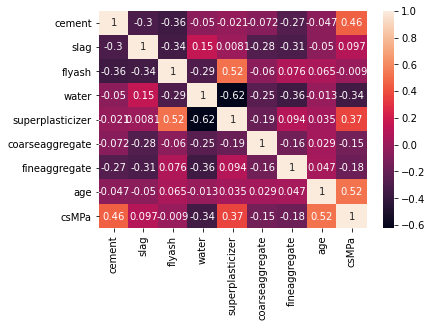

In [6]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [23]:
df.shape

(916, 9)

In [24]:
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


In [5]:
input_cols=df.drop(['csMPa'],axis=1)
target_cols=df['csMPa']

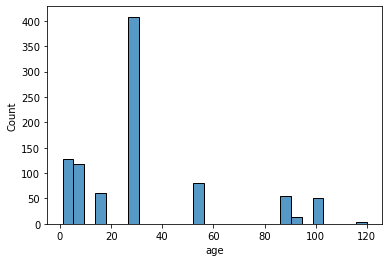

In [33]:
sns.histplot(df['age'])
plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler
standard=StandardScaler()
input_st=standard.fit_transform(input_cols)
input_st=pd.DataFrame(data=input_st,columns=input_cols.columns)

In [7]:
input_cols_trans=np.sqrt(input_cols)
target_cols_trans=np.sqrt(target_cols)

In [36]:
df.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
cement,0.586987,-0.385842
slag,0.820831,-0.564474
flyash,0.375191,-1.454731
water,0.031672,-0.130368
superplasticizer,0.307890,-0.692067
coarseaggregate,-0.137206,-0.563569
fineaggregate,-0.290960,-0.031464
age,1.266122,0.667388
csMPa,0.423756,-0.332932


In [8]:
import statsmodels.api as sm
X = sm.add_constant(input_cols)
y=target_cols
MLR_model = sm.OLS(y,X).fit()
print(MLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  csMPa   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     355.1
Date:                Thu, 28 Jul 2022   Prob (F-statistic):          1.35e-272
Time:                        04:59:33   Log-Likelihood:                -3161.4
No. Observations:                 911   AIC:                             6341.
Df Residuals:                     902   BIC:                             6384.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               54.5668     22.163  

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
x_train,x_test,y_train,y_test=train_test_split(input_cols,target_cols,
                                                       test_size=0.3,random_state=1)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((637, 8), (274, 8), (637,), (274,))

In [10]:
log_model=LinearRegression().fit(x_train,y_train)
y_pred=log_model.predict(x_test)
train_pred=log_model.predict(x_train)
mean_squar_error_test=mean_squared_error(y_pred,y_test)
#mean_squar_error_train=mean_squared_error(y_pred,y_train)
mean_squar_error_train = mean_squared_error(y_train, train_pred)
print('Test Root Mean Squared Error',round(np.sqrt(mean_squar_error_test), 4))
print('Train Root Mean Squared Error',round(np.sqrt(mean_squar_error_train), 4))

Test Root Mean Squared Error 7.8136
Train Root Mean Squared Error 7.7685


In [16]:
lin_model=LinearRegression().fit(x_train,y_train)
y_pred=lin_model.predict(x_test)
mean_squar_error=mean_squared_error(y_pred,y_test)
#print('Root Mean Squared Error',round(np.sqrt(mse_test), 4))
r2_value_rfe = lin_model.score(x_train, y_train)
print('r-squared using VIF is: ', r2_value_rfe)

r-squared using VIF is:  0.7508297967475663


In [17]:
#Eliminating multicollinearity Calculating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Features"] = input_cols.columns
vif["VIF"] = [variance_inflation_factor(input_cols.values, i) for i in range(input_cols.shape[1])]
print(vif)
incols_vif=input_cols[vif[vif['VIF']<=11]['Features']]

           Features        VIF
0            cement  14.145787
1              slag   3.411673
2            flyash   4.975581
3             water  95.274494
4  superplasticizer   5.952955
5   coarseaggregate  84.706969
6     fineaggregate  76.819920
7               age   2.301346


In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
test_col=input_cols.drop(['coarseaggregate','fineaggregate'], axis=1)
vif["Features"] = test_col.columns
vif["VIF"] = [variance_inflation_factor(test_col.values, i) for i in range(test_col.shape[1])]
print(vif)
incols_vif=input_cols[vif[vif['VIF']<=11]['Features']]

           Features        VIF
0            cement  13.306334
1              slag   3.058325
2            flyash   4.777136
3             water  21.214473
4  superplasticizer   4.541739
5               age   2.284390


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
x_train,x_test,y_train,y_test=train_test_split(test_col,target_cols,
                                                       test_size=0.3,random_state=1)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((637, 6), (274, 6), (637,), (274,))

In [13]:
import statsmodels.api as sm
X = sm.add_constant(test_col)
y=target_cols
MLR_model = sm.OLS(y,X).fit()
print(MLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  csMPa   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     472.4
Date:                Thu, 28 Jul 2022   Prob (F-statistic):          1.24e-274
Time:                        04:59:57   Log-Likelihood:                -3162.9
No. Observations:                 911   AIC:                             6340.
Df Residuals:                     904   BIC:                             6373.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               21.8288      3.667  

In [14]:
log_model=LinearRegression().fit(x_train,y_train)
y_pred=log_model.predict(x_test)
train_pred=log_model.predict(x_train)
mean_squar_error_test=mean_squared_error(y_pred,y_test)
#mean_squar_error_train=mean_squared_error(y_pred,y_train)
mean_squar_error_train = mean_squared_error(y_train, train_pred)
print('Test Root Mean Squared Error',round(np.sqrt(mean_squar_error_test), 4))
print('Train Root Mean Squared Error',round(np.sqrt(mean_squar_error_train), 4))

Test Root Mean Squared Error 7.8236
Train Root Mean Squared Error 7.7823


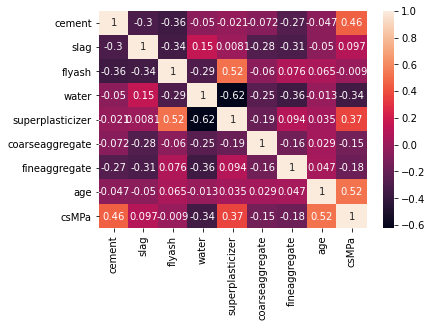

In [18]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [15]:
#Feature selection using REF
from sklearn.feature_selection import RFE
linreg_rfe = LinearRegression()
rfe_model = RFE(estimator=linreg_rfe, n_features_to_select = 8)
rfe_model = rfe_model.fit(x_train, y_train)
feat_index = pd.Series(data = rfe_model.ranking_, index = x_train.columns)
signi_feat_rfe = feat_index[feat_index==1].index
print(signi_feat_rfe)

Index(['cement', 'slag', 'flyash', 'water', 'superplasticizer', 'age'], dtype='object')


In [42]:
#Model Evaluation using Cross validation score
scores = cross_val_score(   estimator = LinearRegression(), 
                            X = x_train, 
                            y = y_train, 
                            cv = 5, 
                            scoring = 'r2',
                         )
print('All scores: ', scores)  
print("\nMinimum score obtained: ", round(min(scores), 4)) 
print("Maximum score obtained: ", round(max(scores), 4))  
print("Average score obtained: ", round(np.mean(scores), 4))

All scores:  [0.77190962 0.67663707 0.80754817 0.72604492 0.68909748]

Minimum score obtained:  0.6766
Maximum score obtained:  0.8075
Average score obtained:  0.7342


In [43]:
#Model Evaluation using K-Fold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

def get_score(model, X_train_k, X_test_k, y_train_k, y_test_k):
    model.fit(X_train_k, y_train_k)                                # fit the model 
    return model.score(X_test_k, y_test_k)  

kf = KFold(n_splits = 5)
scores = []
for train_index, test_index in kf.split(x_train):
    x_train_k, x_test_k, y_train_k, y_test_k = x_train.iloc[train_index], x_train.iloc[test_index], \
                                               y_train.iloc[train_index], y_train.iloc[test_index]
    scores.append(get_score(LinearRegression(), x_train_k, x_test_k, y_train_k, y_test_k))
print('All scores: ', scores)  
print("\nMinimum score obtained: ", round(min(scores), 4)) 
print("Maximum score obtained: ", round(max(scores), 4))  
print("Average score obtained: ", round(np.mean(scores), 4))

All scores:  [0.7719096196832986, 0.6766370748709984, 0.8075481684207243, 0.7260449191336148, 0.6890974776001]

Minimum score obtained:  0.6766
Maximum score obtained:  0.8075
Average score obtained:  0.7342


In [48]:
#Lasso Regression
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.1)
lasso_model = lasso.fit(x_train, y_train)
train_pred = lasso_model.predict(x_train)
mse_train = mean_squared_error(y_train, train_pred)
rmse_train = round(np.sqrt(mse_train), 4)
print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)


test_pred = lasso_model.predict(x_test)
mse_test = mean_squared_error(y_test, test_pred)
rmse_test = round(np.sqrt(mse_test), 4)
print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)

df_lasso_coeff = pd.DataFrame(data = {'Variable': x_train.columns, 'Coefficient': lasso_model.coef_})

print('Least significant variables obtained from Lasso Regression when alpha is 1:',
      df_lasso_coeff.Variable[df_lasso_coeff.Coefficient == 0].to_list())

#Can remove the Status_Developing as it is leastly impacting

Root Mean Squared Error (RMSE) on training set:  7.7823
Root Mean Squared Error (RMSE) on test set:  7.8234
Least significant variables obtained from Lasso Regression when alpha is 1: []


In [46]:
#Grid search
from sklearn.linear_model import ElasticNet
tuned_paramaters = [{'alpha':[0.1,0.5,1,1.5,2,2.5,3,3.5,4],
                      'l1_ratio':[0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9]}]
enet = ElasticNet()
enet_grid = GridSearchCV(estimator = enet, 
                          param_grid = tuned_paramaters, 
                          cv = 10)
enet_grid.fit(x_train, y_train)
print('Best parameters for ELastic-net Regression: ', enet_grid.best_params_, '\n')

Best parameters for ELastic-net Regression:  {'alpha': 0.1, 'l1_ratio': 0.5} 

